In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The embedded survey form must be entirely filled out and submitted on or before **11:59pm on Wednesday September 9**.  Students must come to class the next day prepared to discuss the material covered in this assignment. answer

# Pre-Class Assignment: Optimization

We define Optimization to be a class of problems that try to find the "best" solution over a range of possible solutions.  Typically "best" means finding the maximum (or minimum) value of some sort of calculation. 

### Goals for today's pre-class assignment 

</p>



1. [What are we trying to optimize?](#What_are_we_trying_to_optimize)
1. [Common Optimization Approaches](#Common_Optimization_Approaches)
3. [Git Branching](#git_branching)
4. [Assignment wrap-up](#Assignment_wrap-up)

----
<a name="What_are_we_trying_to_optimize"></a>
# 1. What are we trying to optimize?

The following are some example optimization problems we may use in computational and data sciences. 

* **Mathematical Models:** Often in science we have designed a mathematical model which we then try to fit to experimental data. Sometimes this can be done directly (regression) but often requires trying different parameters. Model optimization (also called parameter optimization) is the process of searching through the model parameters to find the best ones that fit the data.  

* **Machine Learning:** In Machine learning where we have a set of input data that correspond to expected outputs and we use the input/output data to "train" machine learning algorithms and minimize the error between the estimated output and the true output. These models tend to be more general (like neural networks) such that the algorithms not only search the parameters of the mathematical models but such over different models themselves. 

* **Hyperparameter Optimization:** Algorithms can often have lots of input options that "tune" how the algorithm performs on a particular problem.  [Hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization) is the process of searching though all of these tunable parameters to find one that allow for best performance of the algorithm. They are called hyperparameter when the algorithms that are being optimized are machine learning algorithms that can be doing their own optimization (i.e. we are trying to learn the best machine learning algorithm). I like the term meta-optimization but that is just me. 

* **Algorithmic Performance Optimization:** Another common application of optimization in computational and data science is optimizing the performance of an algorithm. Typically this means speeding up the calculations but may also include optimizing for resources such as computer memory.  

----
<a name="Common_Optimization_Approaches"></a>

# 2.  Common Optimization Approaches
When setting up an optimization problem there are two major factors that need to be consider. First, how is the "search space" defined for the problem and second, what is the "fitness" function that is being optimized.  For the purposes of this class we will consider the following example where we want to minimize the function $3x^2 - 10x + 4$ over the range [-10,10].

Let's consider the following approaches:

- [Analytic solutions](#Analytic_solutions)
- [Brute Force Methods](#Brute_Force_Methods)
- [Iterative Methods](#Iterative_Methods)
- [Random_Methods](#Random_Methods)

<a name="Analytic_solutions"></a>
## Analytic solutions

Remember from basic calculus, if the search space for your problem can be represented as a analytic function $f$ that is being minimized it may be possible to directly calculate the minimum of that function.  First you would need to calculate the value of the function at the search space boundaries and then compare the boundary values with the values for which the derivative of $f$ is zero. 

For more on this see [Mimimization and Maximization Refresher](https://mathinsight.org/minimization_maximization_refresher).

Although a powerful approach, analytic solutions only tend to work with problems that have a search space that are mathematically well defined. 

We will use symbolic python (```sympy```) for this analitic example.  I don't have a great video on sympy but some of you may find the following video interesting. 


&#9989; **<font color=red>DO THIS:</font>** Watch the following video.  It is a little long but explains how to make Math look good in videos and has a short example of ```sympy``` (You may want to watch this one at double the speed):

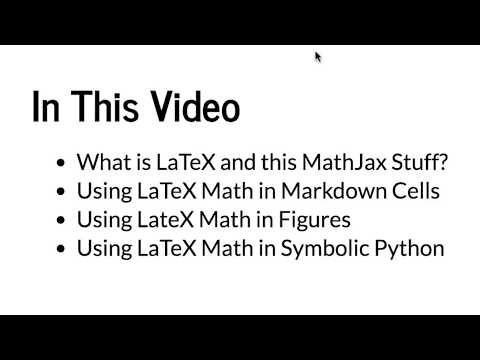

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("qgSa7n_zQ3A",width=640,height=320, cc_load_policy=True)

The Following cell uses symbolic python library to represent a simple parabola and then find the minimum by solving for when the derivative is equal to zero. First we define our symbols and our function as follows:

In [ ]:
%matplotlib inline 
import sympy as sym
sym.init_printing()
x = sym.symbols('x')
y = 3*x**2 - 10*x + 4
y

Plot the function over the default range:

In [ ]:
p1 = sym.plot(y)

Calculate the first derivative using the ```diff``` function:

In [ ]:
dy = sym.diff(y)
dy

Solve for ```x``` analytically:

In [ ]:
sym.solve(dy,x)

<a name="Brute_Force_Methods"></a>

## Brute Force Methods

Assuming there is no easy analytic solution. Probably the most straightforward approach to finding the best solution is to use brute force methods which try to calculate all possible solutions and then pick the one that is the best. These methods require considerable computation power and are only feasible for small problems.  

&#9989; **<font color=red>DO THIS:</font>** Please watch this video on the basics of ```numpy```. This is included as a review to people still new to python and numpy.  Feel free to skip or run at double speed. 

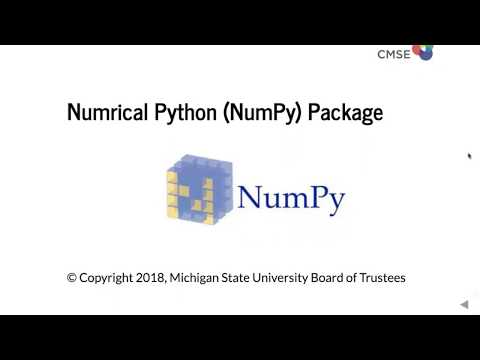

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("_hbWtNgstlI",width=640,height=320, cc_load_policy=True)

In [ ]:
import matplotlib.pylab as plt
import numpy as np

x = np.linspace(-10,10,1000)
y = 3*x**2 - 10*x + 4
plt.plot(x,y)



In [ ]:
i = np.argmin(y)
x[i]

<a name="Iterative_Methods"></a>
## Iterative Methods

(Note: This section is a review of Gradient Decent (A type of optimization) from [1102_NN_in-class-assignment](1102_NN_in-class-assignment.ipynb) where we talked about Neural Networks.)


Gradient Decent is an example of an iterative method.  For iterative methods you start by making some sort of guess as to the "best" solution and then refine the guess with better and better solutions.

>Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved using calculus, taking steps in the negative direction of the function gradient.

From: https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/


In [2]:
%matplotlib inline
import matplotlib.pylab as plt
from IPython.display import display, clear_output
import time
def show_animation(delay=0.01):
    fig = plt.gcf()
    time.sleep(delay)       # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots

In [ ]:
import numpy as np

# Define the function (parabola)
def f1(x):
    return 3*x**2 - 10*x + 4

#Derivative of F1 (also called the gradient)
def grad_f1(x):
    return 6*x - 10

# Choose the x points
x = np.array([i for i in range(-1000, 1000)])

#Plot the funciton
plt.plot(x, f1(x))
plt.ylim(-10,100)
plt.xlim(-10,10)

In [ ]:
##Gradient Decent

x0 = 7                                 # starting point for gradient descent
eta = 0.05                             # step size (a.k.a learning rate)
p = .0001                              # chosen precision
maxIter = 30                           # maximum number of iterations

former_min = x0
iterative_mins = [former_min]
iterCounter = 1

while True:
    new_min = former_min - eta * grad_f1(former_min)
    
    iterative_mins.append(new_min)
    if abs(former_min - new_min) <= p:
        print('Local min of function is %f' %new_min)
        print('Number of iterations: %d' %iterCounter)
        break
    else:
        former_min = new_min
        
    if iterCounter == maxIter:
        print('Local min not reached')
        break
    else:
        iterCounter += 1       

    plt.figure(0)
    plt.plot(x, f1(x), lw=3)
    plt.ylim(-10,100)
    plt.xlim(-10,10)
    plt.title('Iterative descent to minimum:'+str(new_min))
    plt.plot(iterative_mins, f1(np.array(iterative_mins)), marker='o')
    show_animation(0.5)

In [ ]:
plt.plot(iterative_mins)
plt.title("Iterative change in minimum")

<a name="Random_Methods"></a>
## Random Methods

Also called [Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method), random methods are just that, random. These methods randomly start and different points within a search space. With enough random samples distributed across the search space we may be able to assume (for some problems) that we found a good solution. Monte Carlo Methods are often combined with iterative methods to come up with fairly robust solutions (there is no guarantee of optimality). 

In [ ]:
from random import uniform

searchspace = [-10,10]
best_y = 100000
best_x = []
for i in range(1000):
    x = uniform(-10,10)
    y = 3*x**2 - 10*x + 4
    if y < best_y:
        best_y = y
        best_x = x
best_x

----
<a name="Optimization Libraries"></a>
# 3. Optimization Libraries

There is no one "correct" optimization method for all problems.  You need to pick the method that best fits the problem at hand. The```SciPy``` module has an optimization library built in. Explore what it can do using the following code:

In [ ]:
import scipy.optimize as optimize

In [ ]:
dir(optimize)

In [ ]:
help(optimize)

In [ ]:
optimize.show_options()

&#9989; **<font color=red>DO THIS:</font>**  See if you can figure out how to use the optimization library to solve the example problem provided.

&#9989; **<font color=red>QUESTION:</font>** Why do you think these automated solution libraries (ex: ```scipy.optimize```) do not work well for the problem of Algorithmic Performance Optimization?  What is special about performance optimization that makes it particularly hard to optimize?

Put your answer to the above question here. Think about your answer and come to class ready to discuss your thoughts.

----
<a name="git_branching"></a>

# 3. Git Branching

If you have not already done this, now is a good time to review the following videos which talk about git branching. It is generally good practice to make changes in a branch instead of working from the master branch.   Please review the following videos and come to class ready to practice branching.


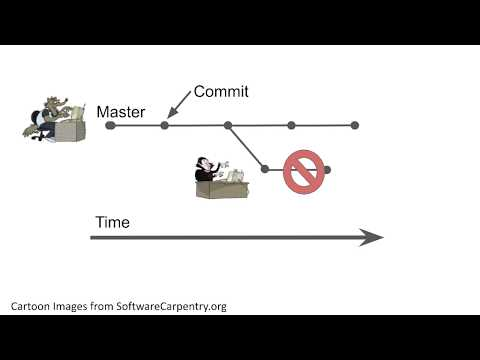

In [7]:
# Git Branching https://www.youtube.com/playlist?list=PLqPfbT7gwVP_AlE6HeDQUJsG4nUbGyeh3
from IPython.display import YouTubeVideo
YouTubeVideo("X0jbrdemjjs",width=640,height=360, cc_load_policy=True)

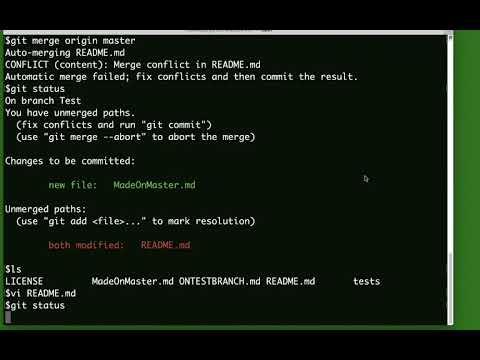

In [8]:
# Merging a Branching https://www.youtube.com/playlist?list=PLqPfbT7gwVP_AlE6HeDQUJsG4nUbGyeh3
from IPython.display import YouTubeVideo
YouTubeVideo("Byp7TFk5jYw",width=640,height=360, cc_load_policy=True)

&#9989; **<font color=red>DO THIS:</font>** Using your existing course repository or clone it again and start from scratch.  Create a branch and commit all of the jupyter notebooks for the class up to this point.  Use this branch for all of your notes in class and leave the master branch prestene.  

----
<a name="Assignment_wrap-up"></a>
# 4. Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

[Direct Link to Google Form](https://cmse.msu.edu/cmse802-pc-survey)


If you have trouble with the embedded form, please make sure you log on with your MSU google account at [googleapps.msu.edu](https://googleapps.msu.edu) and then click on the direct link above.

&#9989; **<font color=red>Assignment-Specific QUESTION:</font>** Where you able to get the optimization library to work for the simple example?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Summarize what you did in this assignment.

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  How well do you feel this assignment helped you to achieve a better understanding of the above mentioned topic(s)?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What was the **most** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What was the **least** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Do you have any further questions or comments about this material, or anything else that's going on in class?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** Approximately how long did this pre-class assignment take?

Put your answer to the above question here

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse802-pc-survey?embedded=true" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit the above survey form on or before the assignment due date.

### Course Resources:


- [Website](https://msu-cmse-courses.github.io/cmse802-f20-student/)
- [ZOOM](https://msu.zoom.us/j/97272546850)
- [Syllabus](https://docs.google.com/document/d/e/2PACX-1vT9Wn11y0ECI_NAUl_2NA8V5jcD8dXKJkqUSWXjlawgqr2gU5hII3IsE0S8-CPd3W4xsWIlPAg2YW7D/pub)
- [Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vQRAm1mqJPQs1YSLPT9_41ABtywSV2f3EWPon9szguL6wvWqWsqaIzqkuHkSk7sea8ZIcIgZmkKJvwu/pubhtml?gid=2142090757&single=true)



&#169; Copyright 2020,  Michigan State University Board of Trustees